In [ ]:
# 1-Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
# 2-Import Data
data = pd.read_csv('/content/breast-cancer.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data['diagnosis']=data['diagnosis'].map({'M':0,'B':1})

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
variables = data.iloc[:, 1:]
labels = data.iloc[:, 0]

In [ ]:
print(variables)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            0        17.99         10.38          122.80     1001.0   
1            0        20.57         17.77          132.90     1326.0   
2            0        19.69         21.25          130.00     1203.0   
3            0        11.42         20.38           77.58      386.1   
4            0        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          0        21.56         22.39          142.00     1479.0   
565          0        20.13         28.25          131.20     1261.0   
566          0        16.60         28.08          108.30      858.1   
567          0        20.60         29.33          140.10     1265.0   
568          1         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

In [ ]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# outlier detection
Q1 = variables.quantile(0.25)
Q3 = variables.quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

print('Lower Whisker:')
print(Lower_Whisker)
print('\n\n\nUpperWhisker:')
print(Upper_Whisker)

Lower_outliers = variables < Lower_Whisker
Upper_outliers = variables > Upper_Whisker

Lower_outliers_index = Lower_outliers.any(axis=1)
Upper_outliers_index = Upper_outliers.any(axis=1)

Lower Whisker:
diagnosis                   -1.500000
radius_mean                  5.580000
texture_mean                 7.725000
perimeter_mean              31.775000
area_mean                 -123.300000
smoothness_mean              0.057975
compactness_mean            -0.033300
concavity_mean              -0.122150
concave points_mean         -0.060225
symmetry_mean                0.111200
fractal_dimension_mean       0.045070
radius_se                   -0.137350
texture_se                  -0.126250
perimeter_se                -1.020500
area_se                    -23.160000
smoothness_se                0.000703
compactness_se              -0.015975
concavity_se                -0.025350
concave points_se           -0.002970
symmetry_se                  0.002680
fractal_dimension_se        -0.001217
radius_worst                 4.340000
texture_worst                8.120000
perimeter_worst             22.175000
area_worst                -337.750000
smoothness_worst             0.0725

In [ ]:
print(f'There are {sum(Lower_outliers_index)} points below the lower whisker')
print(f'There are {sum(Upper_outliers_index)} points above the upper whisker')

There are 3 points below the lower whisker
There are 170 points above the upper whisker


In [ ]:
median = variables.median()
variables = variables.where((variables >= Lower_Whisker) & (variables <= Upper_Whisker), median, axis=1)

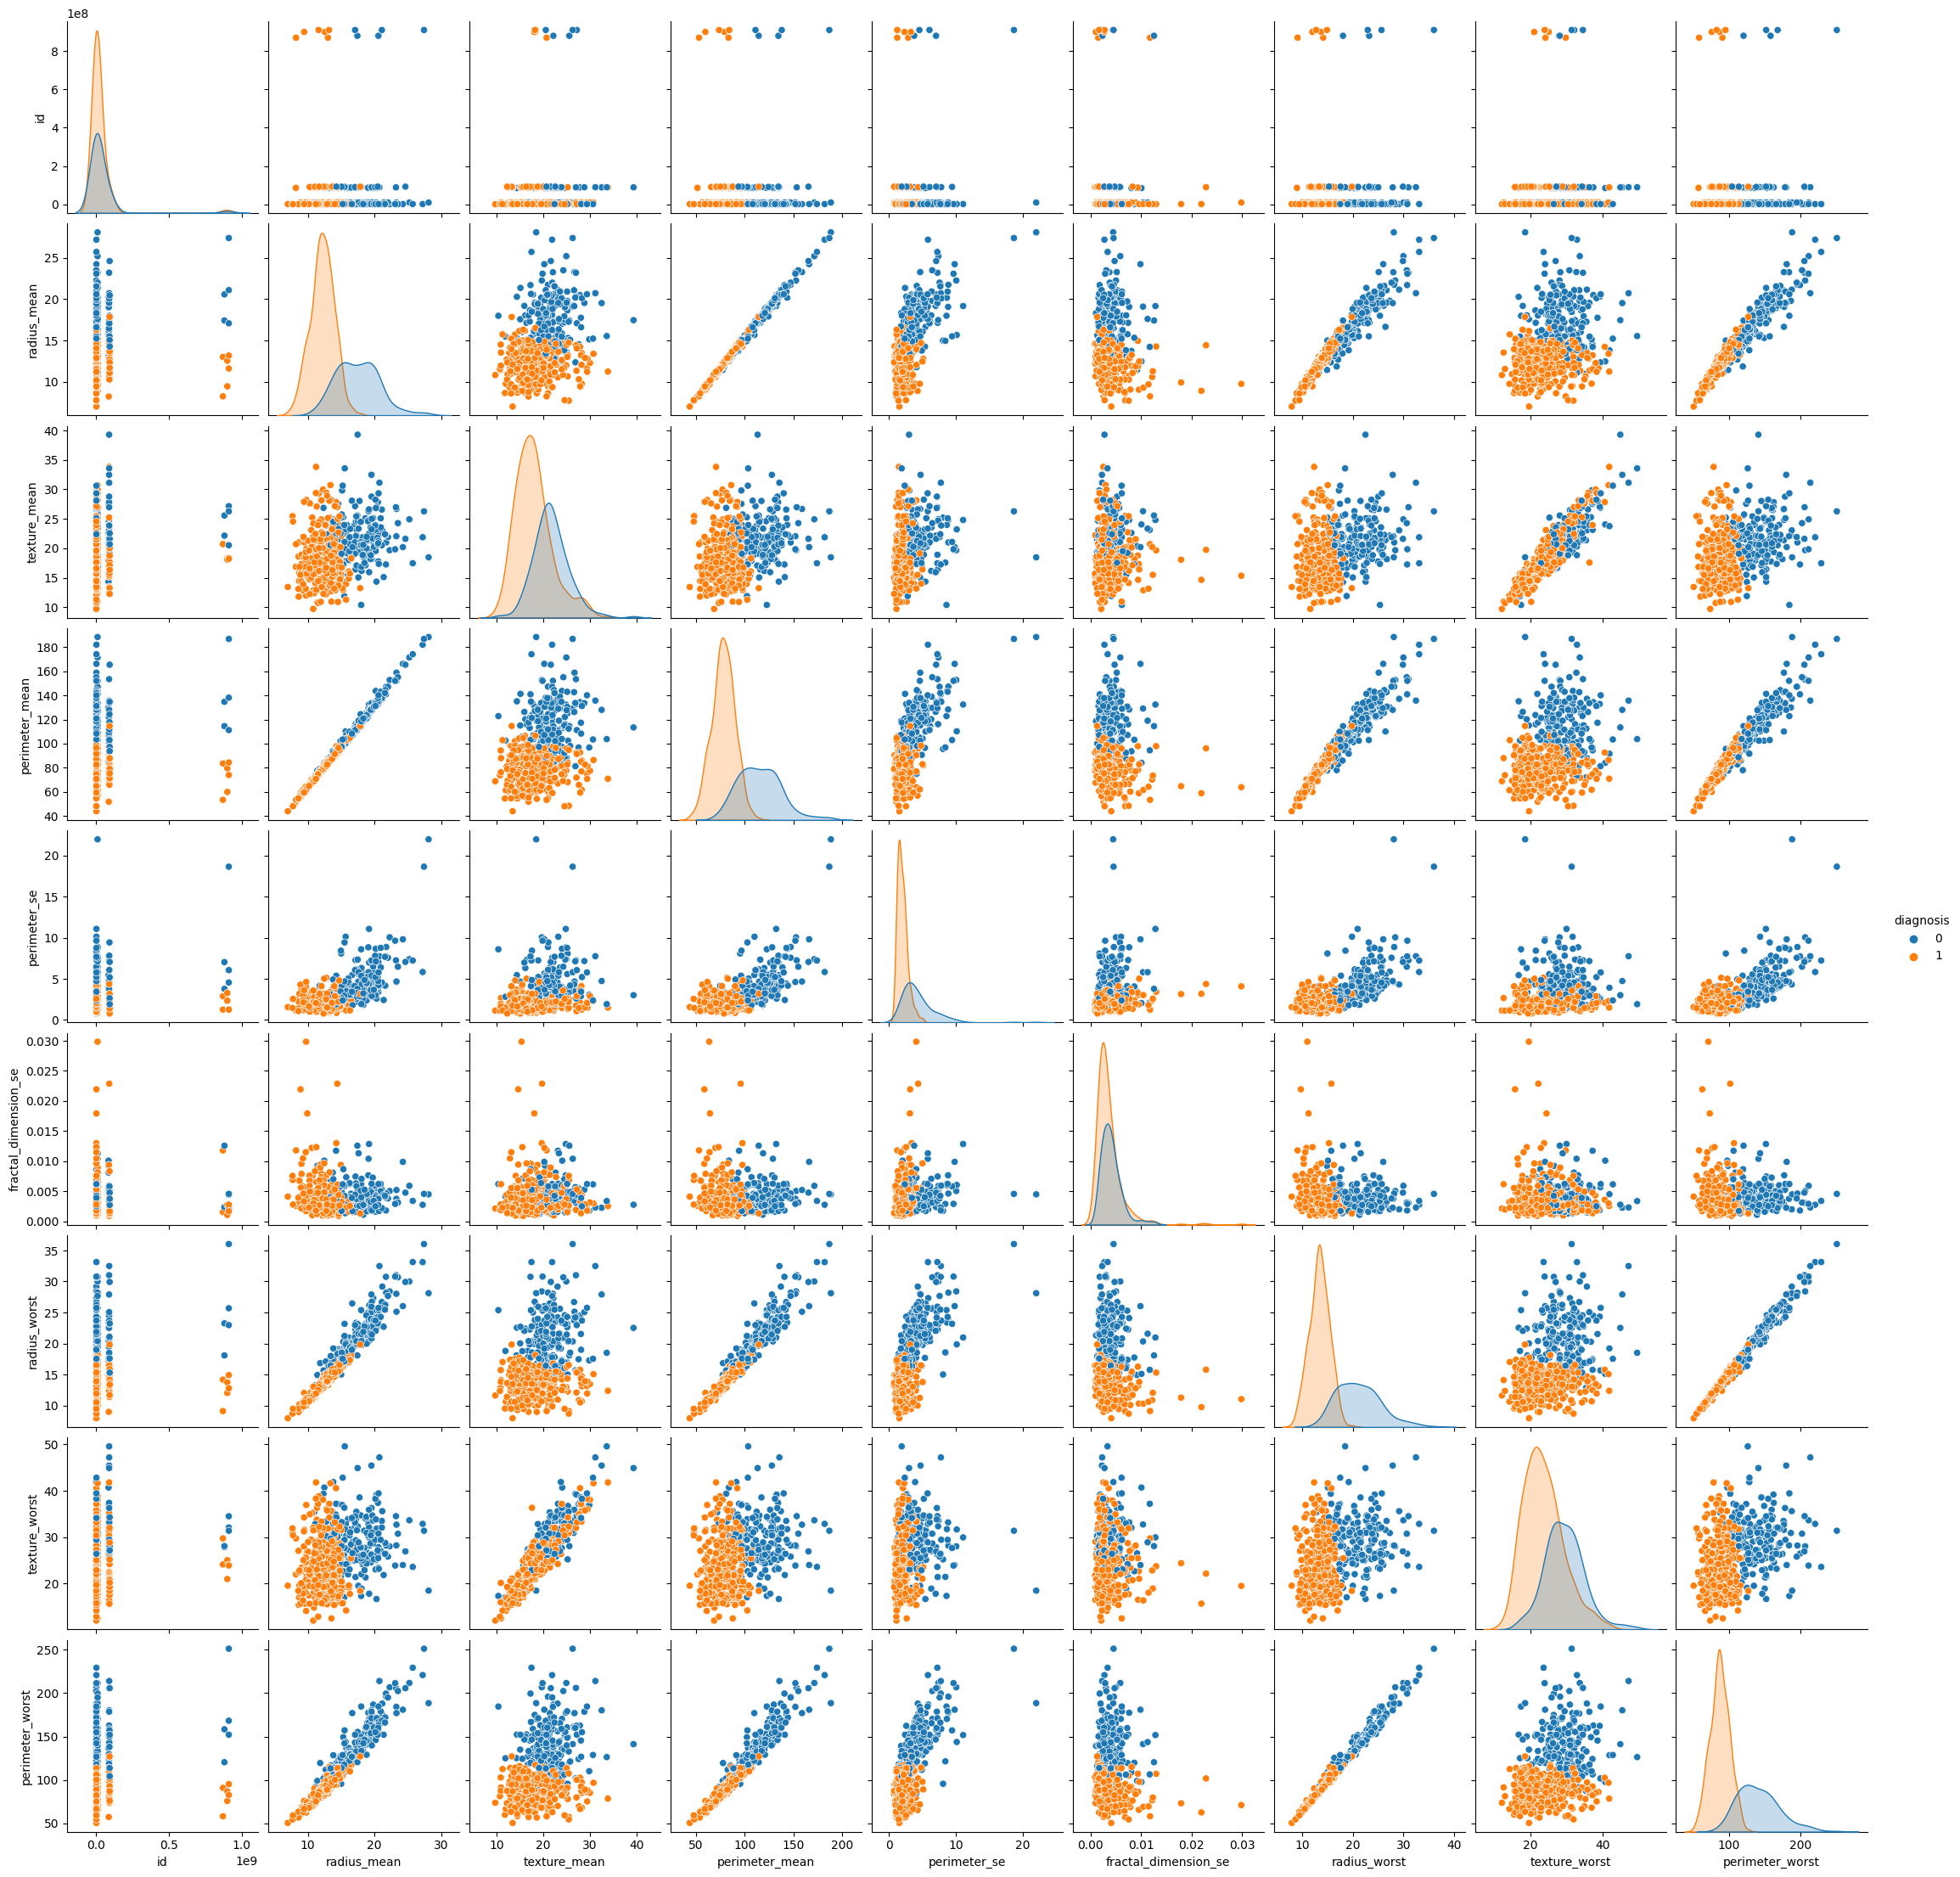

In [ ]:
# Pair plot
# For illustration purposes
data_visualization = data.iloc[:, [0, 1, 2, 3, 4, 14, 21, 22, 23, 24]]
sns.pairplot(data_visualization, hue='diagnosis')

Text(0.5, 1.0, 'Correlation matrix')

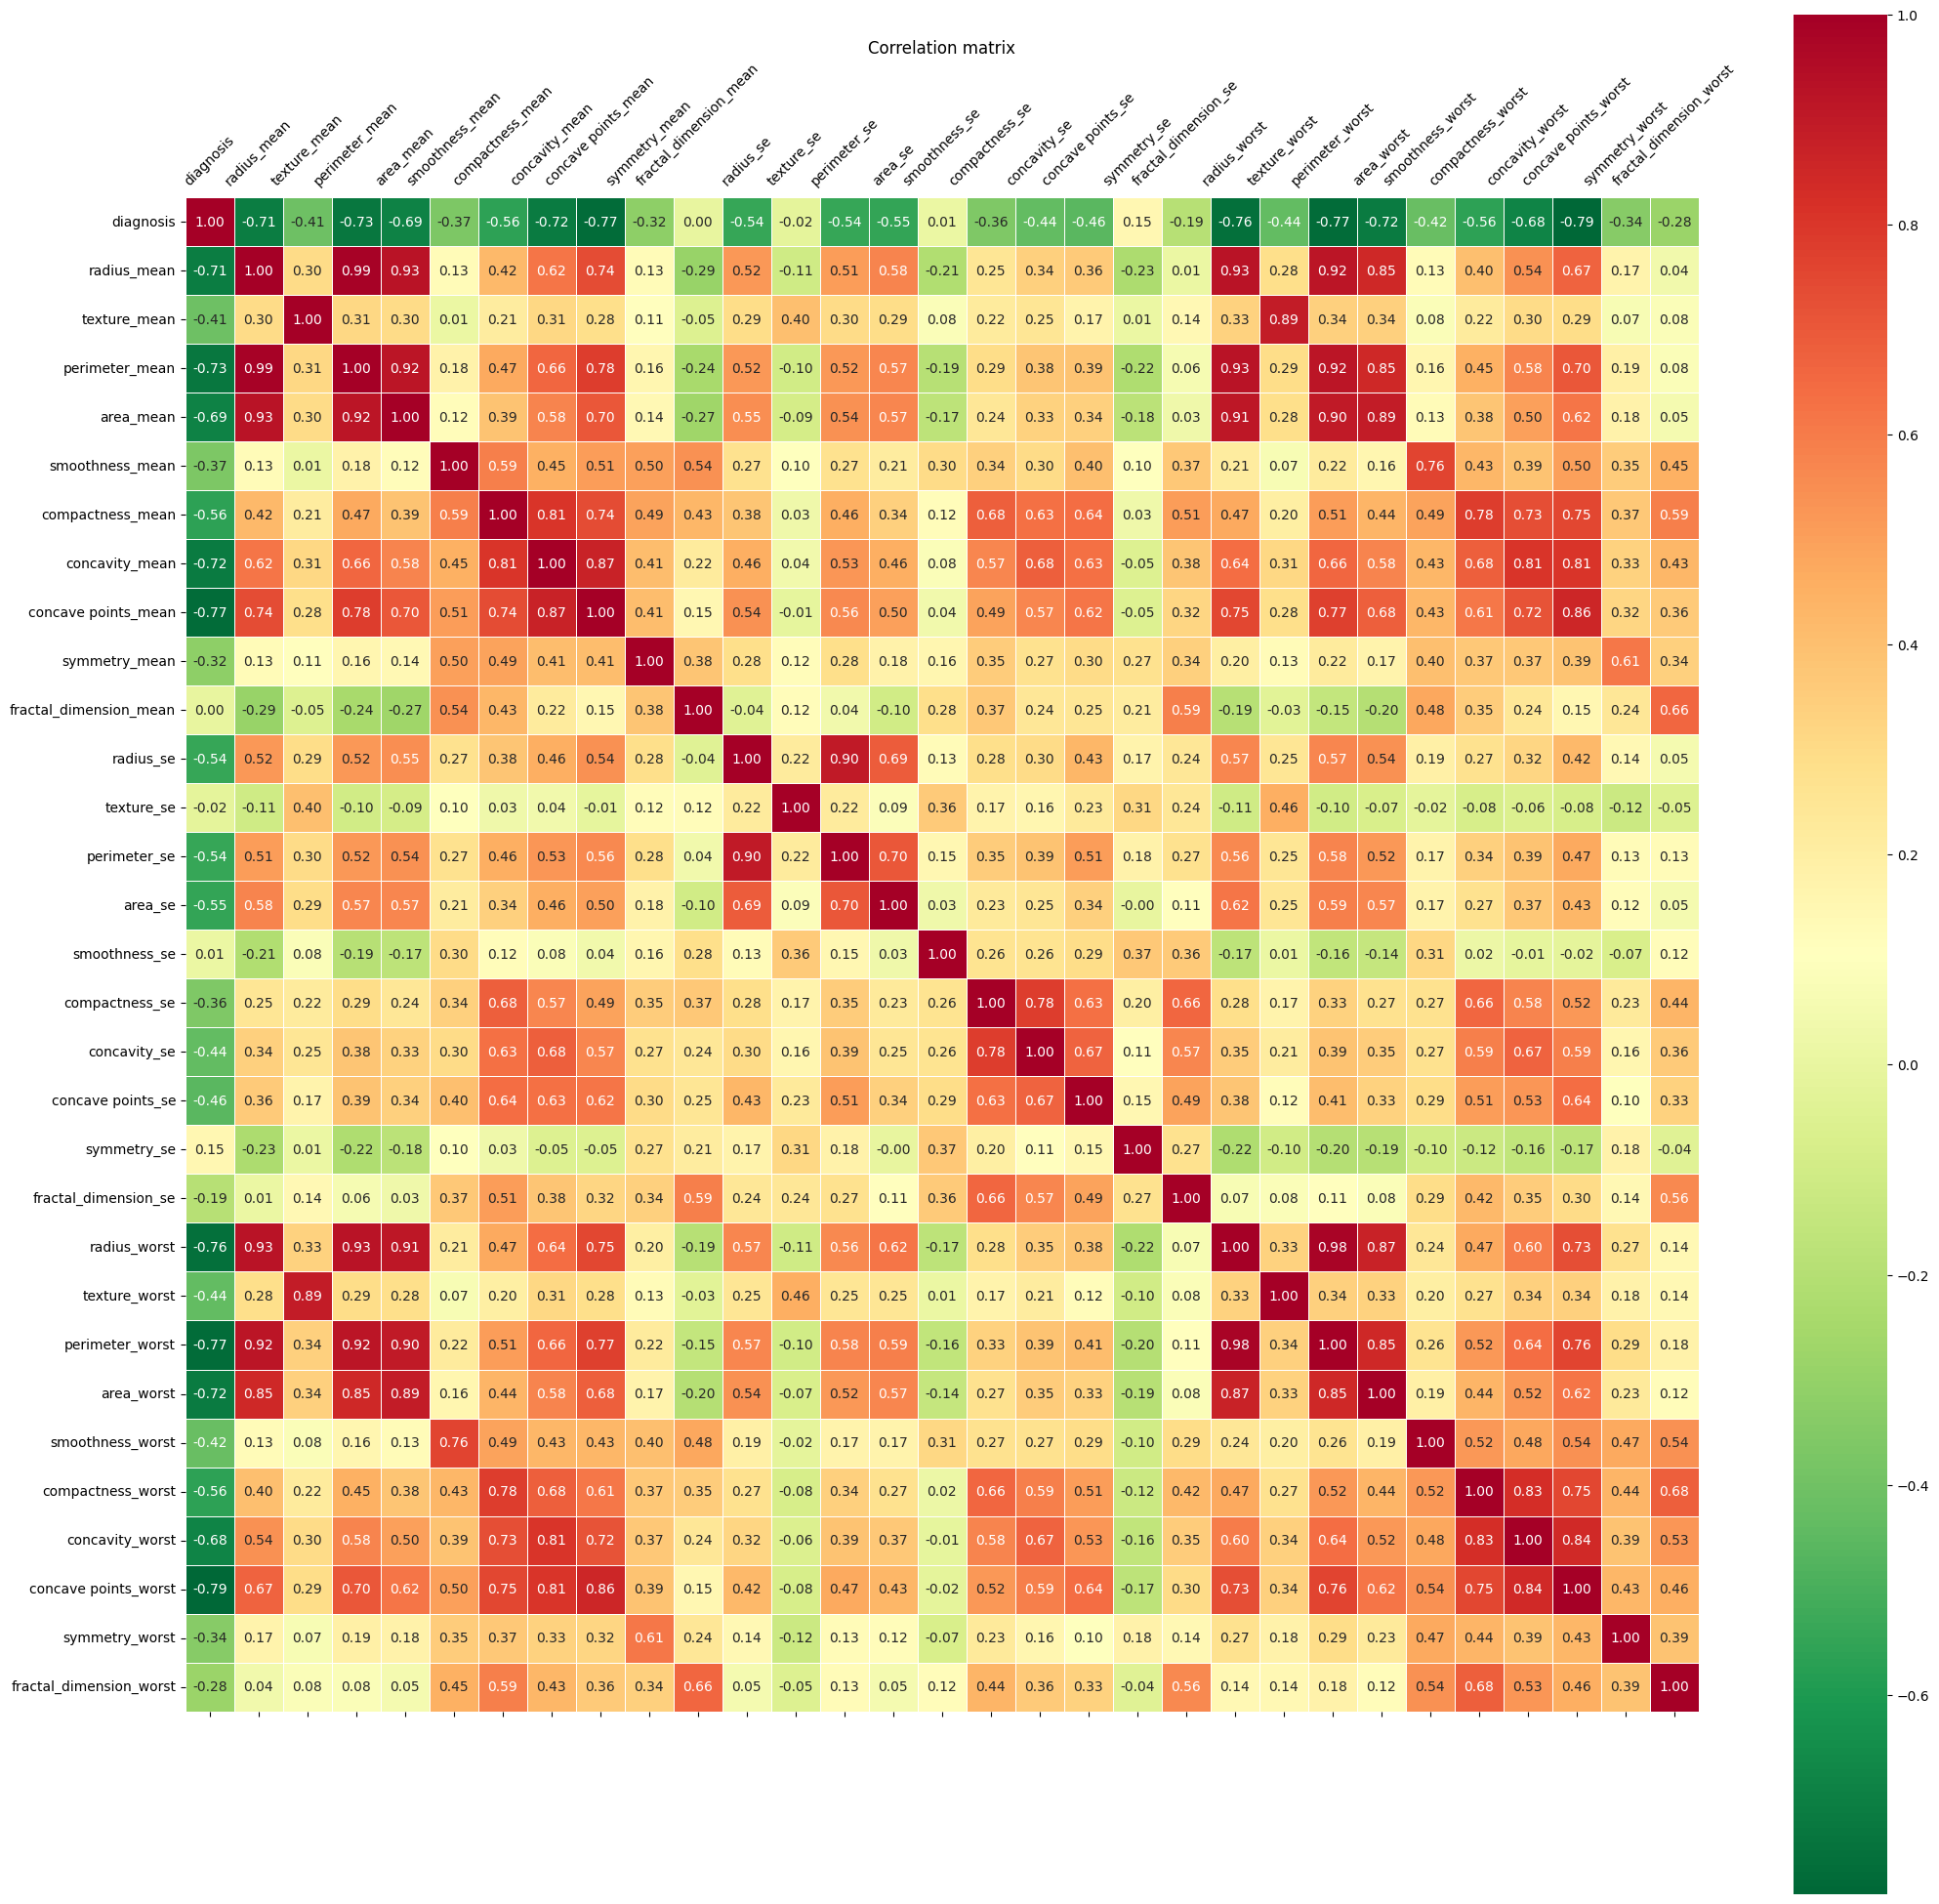

In [ ]:
correlation = variables.corr('pearson')
plt.figure(figsize=(25,25), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.heatmap(correlation.round(2), cmap='RdYlGn_r', linewidths=0.5, annot=True,
                 cbar=True, square=True, fmt='0.2f')
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False, labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Correlation matrix')

In [ ]:
# Label Encoding
labels_encoder_response = LabelEncoder()
labels = labels_encoder_response.fit_transform(labels)

In [ ]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(variables, labels, test_size=0.2, random_state=0)

# standardization
sc_training = StandardScaler()
X_train = sc_training.fit_transform(X_train)
X_test = sc_training.transform(X_test)

# Principal component analysis
pca = PCA()
Z_train = pca.fit_transform(X_train)
Z_test = pca.transform(X_test)

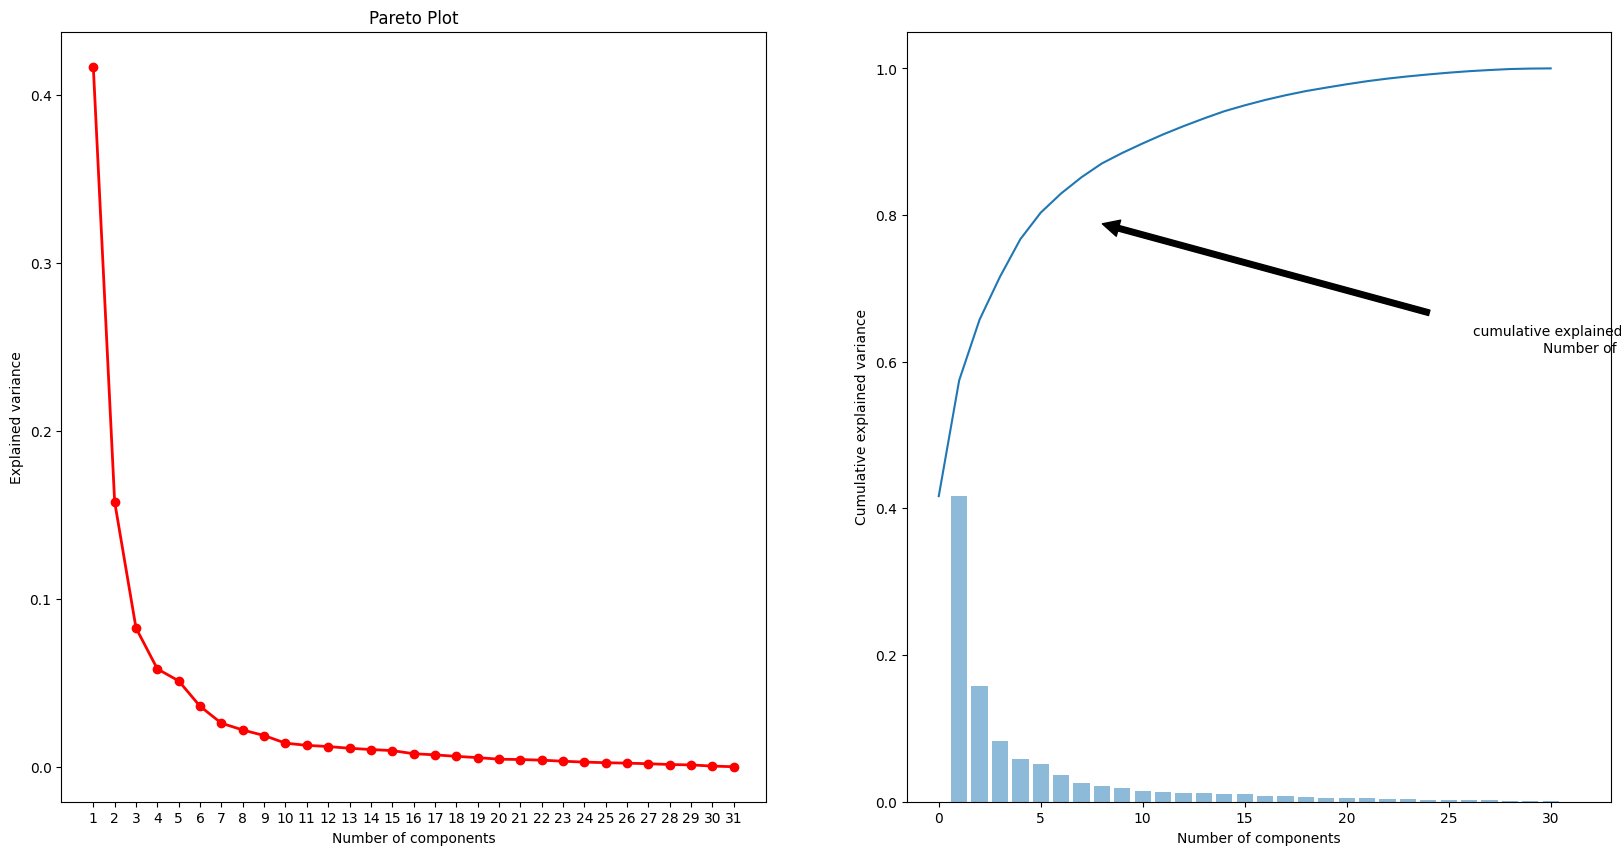

In [ ]:
# Eigenvalues
Eigen_Values = pca.explained_variance_
ell = pca.explained_variance_ratio_


# Scree plot
plt.subplots(1, 2, figsize = (20, 10))

ax1 = plt.subplot(1, 2, 1)
x = np.arange(len(Eigen_Values)) + 1
ax1.plot(x, Eigen_Values / Eigen_Values.sum(), 'ro-', lw=2)
ax1.set_xticks(x, ["" + str(i) for i in x])
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance')
ax1.set_title('Scree Plot')

# Pareto plot
ax2 = plt.subplot(1, 2, 2)
ind = np.arange(1, len(ell) + 1)
ax2.bar(ind, ell, align='center', alpha=0.5)
ax2.plot(np.cumsum(ell))
ax2.set_xlabel('Number of components')
ax2.set_ylabel('Cumulative explained variance')
ax1.set_title('Pareto Plot')

for x, y in zip(ind, np.cumsum(ell)):
    label = "{:.2f}".format(y)
    if float(label) >= 0.79:
        plt.annotate("cumulative explained variance: " + label + "\n" +
                     "Number of PC: " + str(x),  # this is the text
                     (x, y),  # this is the point to label
                     textcoords='figure fraction',  # how to position the text
                     xytext=(.8, 0.5),  # distance from text to points (x,y)
                     arrowprops=dict(facecolor='black', shrink=0.1),
                     horizontalalignment='left',
                     verticalalignment='bottom',
                     ha='center')  # horizontal alignment can be left, right or center
        NUMBER_OF_PCs = x # for further use
        break

In [ ]:
Z_train = Z_train[:, :NUMBER_OF_PCs]
Z_test = Z_test[:, :NUMBER_OF_PCs]

In [ ]:
print(Z_train,Z_test)

[[-3.33144531 -1.69732809  0.9976498  -0.68465427 -1.37322311 -0.38559043]
 [-2.23903068 -0.73540006  1.23937751 -1.66097335 -0.70985693  0.68106087]
 [-0.95582342  2.59062994 -2.01843668  0.91755112  0.20869655  0.17432187]
 ...
 [-3.23649031 -0.88429798  1.10002668  0.28170445 -0.93498124 -1.59519529]
 [-6.11399367  1.50176821  0.1429985  -0.24929523 -0.62580794 -0.26365186]
 [-0.67302638 -1.80025478  1.06378433 -2.41420676  2.71035853 -1.12544021]] [[ 3.68327209e+00 -2.49253693e+00 -1.90423433e+00 -8.96308225e-01
  -1.34127750e+00  3.38827658e-02]
 [-2.93707118e+00  1.88856438e+00  6.29150374e-01 -2.74231283e+00
  -2.26141073e-01 -6.31690050e-01]
 [-3.37309795e+00  2.84677255e+00 -9.30531506e-01  6.37818854e-01
   1.32295013e+00 -4.92289114e-01]
 [-2.78784644e+00  3.29930298e+00 -1.32059606e+00 -9.61680437e-01
   1.08150112e+00  1.13096028e+00]
 [-4.24622364e+00  1.58742718e+00  2.11491908e+00 -1.55435472e-01
   5.91910921e-01  1.14727549e-02]
 [-2.53196308e+00 -1.09727154e+00 -1.88

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/breast-cancer.csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df = df.drop(['id'], axis=1)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_features = df.drop(['diagnosis'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
standardized = StandardScaler()

In [ ]:
standardized.fit(df_features)

StandardScaler()

In [ ]:
scaled_data = standardized.transform(df_features)

In [ ]:
#PCA
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)

In [ ]:
pca.fit(scaled_data)

PCA(n_components=3)

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape



(569, 30)

In [ ]:
x_pca.shape


(569, 3)

In [ ]:
def diag(x):
    if x =='M':
        return 1
    else:
        return 0
df_diag= df['diagnosis'].apply(diag)
##or data['diagnosis']=data['diagnosis'].map({'M':0,'B':1})

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
x_pca[:1]

array([[ 9.19283683,  1.94858307, -1.12316633]])

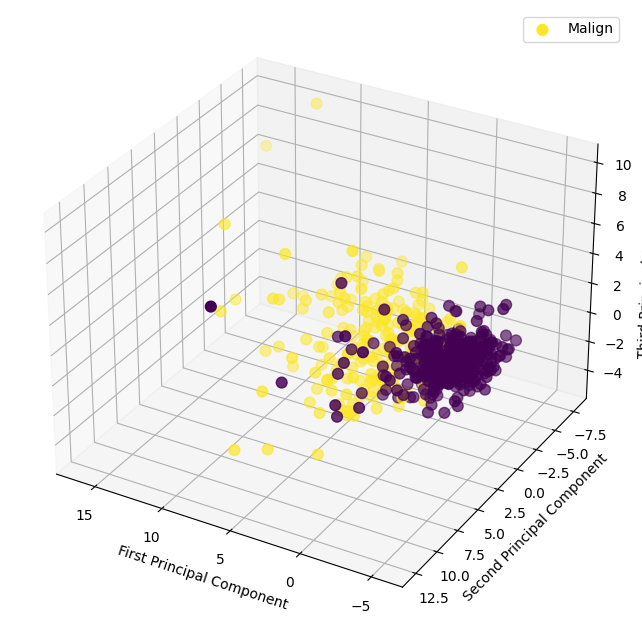

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=df_diag, s=60)
ax.legend(['Malign'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)

Text(0, 0.5, 'Third Principal Component')

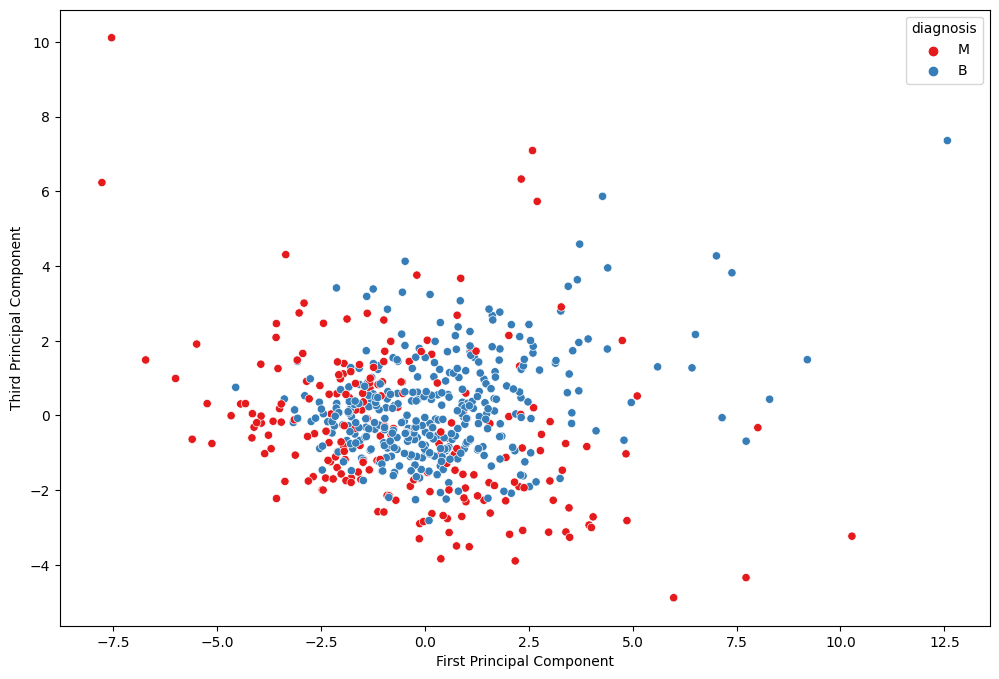

In [ ]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x=x_pca[:,1],y= x_pca[:,2], hue=df['diagnosis'], palette ='Set1')
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')

Text(0, 0.5, 'Second Principal Component')

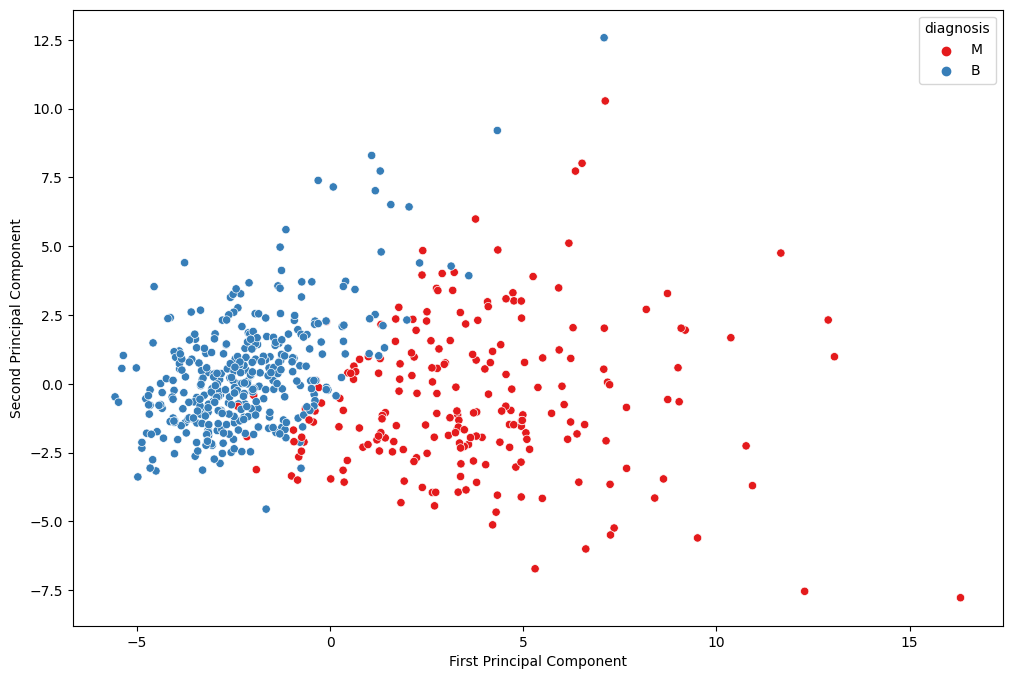

In [ ]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x=x_pca[:,0],y= x_pca[:,1],hue=df['diagnosis'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:
df_pc = pd.DataFrame(pca.components_, columns = df_features.columns)

In [ ]:
df_pc

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034767,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074091,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236075,-0.173057,-0.170344,-0.271313,-0.232791


Text(158.22222222222223, 0.5, 'Principal Components')

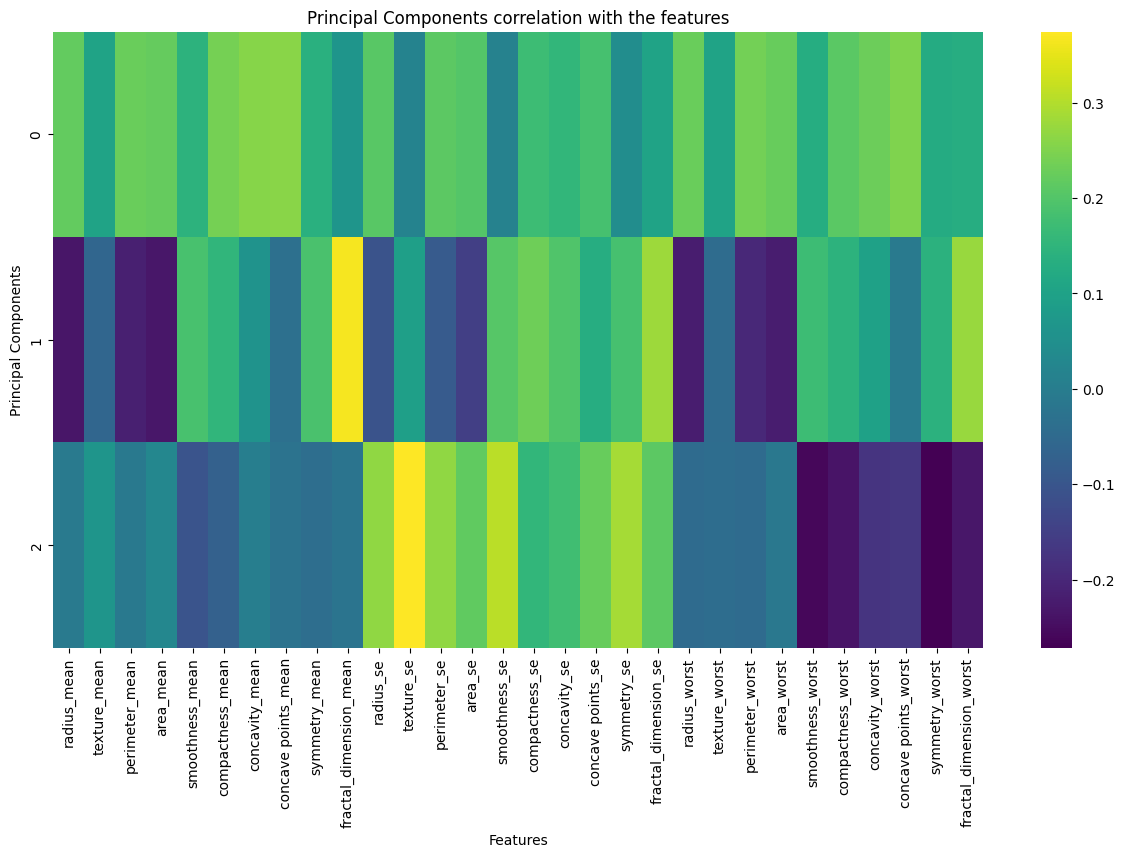

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_pc, cmap='viridis')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')

SELECT PERCENTILE METHOD


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectPercentile, f_classif

# Load the dataset from CSV file
df = pd.read_csv('/content/breast-cancer.csv')
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Perform dimensionality reduction using SelectPercentile
percentile = 10  # Percentage of top features to select
selector = SelectPercentile(f_classif, percentile=percentile)
X_new = selector.fit_transform(X, y)

# Display the results
print(f'Selected top {percentile}% features:')
print(X.columns[selector.get_support()])
print(f'Original shape: {X.shape}, New shape: {X_new.shape}')


Selected top 10% features:
Index(['concave points_mean', 'perimeter_worst', 'concave points_worst'], dtype='object')
Original shape: (569, 30), New shape: (569, 3)


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Perform dimensionality reduction using SelectKBest
k = 10  # Number of top features to select
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Display the results
print(f'Selected {k} best features:')
print(X.columns[selector.get_support()])
print(f'Original shape: {X.shape}, New shape: {X_new.shape}')


Selected 10 best features:
Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')
Original shape: (569, 30), New shape: (569, 10)


SELECT K BEST

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif

# Load the breast cancer dataset from the UCI repository
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
#names = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",

data = pd.read_csv('/content/breast-cancer.csv')

# Separate the input features from the target variable
X = data.iloc[:, 2:]
y = data["diagnosis"]

# Perform dimensionality reduction using SelectKBest method
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Display the result
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_new.shape[1])
print("Selected features:", selector.get_support())


Original number of features: 30
Reduced number of features: 10
Selected features: [ True False  True  True False False  True  True False False False False
 False False False False False False False False  True False  True  True
 False False  True  True False False]


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif

# Load the breast cancer dataset from a CSV file
df = pd.read_csv('/content/data.csv')

# Split the dataset into features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Perform feature selection using SelectKBest method
k = 10 # number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]

# Display the selected feature names
print(f"The top {k} selected features are:")
print(selected_features)


ValueError: ignored

2 ND TRY


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.decomposition import PCA

# Load the breast cancer dataset from a CSV file
df = pd.read_csv('/content/breast-cancer.csv')

# Split the dataset into features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Perform feature selection using SelectKBest method
k = 10  # number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_kbest = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Perform feature selection using SelectPercentile method
percentile = 50  # percentage of top features to select
selector = SelectPercentile(score_func=f_classif, percentile=percentile)
X_percentile = selector.fit_transform(X, y)

# Perform dimensionality reduction using PCA technique
n_components = 2  # number of principal components to retain
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
eigenvalues = pca.explained_variance_

# Display the reduced dimensionality and selected feature names
print(f"Reduced dimensionality using SelectKBest: {X_kbest.shape[1]}")
print(f"Selected features using SelectKBest: {selected_features}")
print(f"Reduced dimensionality using SelectPercentile: {X_percentile.shape[1]}")
print(f"Reduced dimensionality using PCA: {X_pca.shape[1]}")
print(f"Eigenvalues of the principal components: {eigenvalues}")


Reduced dimensionality using SelectKBest: 10
Selected features using SelectKBest: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')
Reduced dimensionality using SelectPercentile: 15
Reduced dimensionality using PCA: 2
Eigenvalues of the principal components: [1.56301468e+16 4.38844340e+05]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [ ]:
principal_breast_Df = pd.DataFrame(data = X_train
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principal_breast_Df.tail()

,principal component 1,principal component 2
450,1.087644,-0.835089
451,-0.800876,2.921819
452,-0.680448,-0.515300
453,-0.953432,-1.148772
454,-0.642447,0.158044


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# Load the breast cancer dataset from a CSV file
df = pd.read_csv('/content/data.csv')

# Split the dataset into features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import (RFE, SelectKBest,SelectPercentile)
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



cancer = load_breast_cancer(as_frame=True)
X = cancer['data']
print(f"Features shape: {X.shape}")
y = cancer['target']
print(f"Target shape: {y.shape}\n")




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#select K best



from sklearn.feature_selection import chi2
kbest = SelectKBest(score_func=chi2, k=5)
kbest.fit(X_train, y_train)
kbest_features = X_train.columns[kbest.get_support()]
print(f"===== {len(kbest_features)} features were selected =====")
print(kbest_features)





#select Percentile





percentile = SelectPercentile(score_func=chi2, percentile=20)
percentile.fit(X_train, y_train)
percentile_features = X_train.columns[percentile.get_support()]
print(f"===== {len(percentile_features)} features were selected =====")
print(percentile_features)



#PCA



path = input("Enter Path : ")
file = pd.read_csv(path)
file.tail()



file.shape




features = file.columns
print(features)




file["diagnosis"].replace({'M' : 1 ,'B' : 0},inplace = True)




from sklearn.preprocessing import StandardScaler
x = file.loc[:, features].values
x = StandardScaler().fit_transform(x)





x = file.drop("diagnosis" ,axis= 1)
y = file["diagnosis"]




from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)



principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])




principal_breast_Df.tail()


Features shape: (569, 30)
Target shape: (569,)

===== 5 features were selected =====
Index(['mean perimeter', 'mean area', 'area error', 'worst perimeter',
       'worst area'],
      dtype='object')
===== 6 features were selected =====
Index(['mean perimeter', 'mean area', 'area error', 'worst radius',
       'worst perimeter', 'worst area'],
      dtype='object')
Enter Path : /content/breast-cancer.csv
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_

,principal component 1,principal component 2
564,-2.944541e+07,1430.693656
565,-2.944515e+07,1061.599145
566,-2.944488e+07,331.077904
567,-2.944459e+07,1141.435887
568,-3.027908e+07,-754.562301


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import (RFE, SelectKBest,SelectPercentile)
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Load the breast cancer dataset from a CSV file
df = pd.read_csv('/content/breast-cancer.csv')
df.shape

(569, 32)

In [ ]:
# Split the dataset into features and target variable
X = df.drop(['diagnosis','id'], axis=1)
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}\n")


Features shape: (569, 30)
Target shape: (569,)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#select K best
from sklearn.feature_selection import chi2
kbest = SelectKBest(score_func=chi2, k=5)
kbest.fit(X_train, y_train)
kbest_features = X_train.columns[kbest.get_support()]
print(f"===== {len(kbest_features)} features were selected =====")
print(kbest_features)

===== 5 features were selected =====
Index(['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
       'area_worst'],
      dtype='object')


In [ ]:
#select Percentile
percentile = SelectPercentile(score_func=chi2, percentile=20)
percentile.fit(X_train, y_train)
percentile_features = X_train.columns[percentile.get_support()]
print(f"===== {len(percentile_features)} features were selected =====")
print(percentile_features)

===== 6 features were selected =====
Index(['perimeter_mean', 'area_mean', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst'],
      dtype='object')


In [ ]:
#PCA
path = input("Enter Path : ")
file = pd.read_csv(path)
print(file.shape)


Enter Path : /content/breast-cancer.csv
(569, 32)


In [ ]:
features = file.columns
print(features)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
file["diagnosis"].replace({'M' : 1 ,'B' : 0},inplace = True)
file.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:

from sklearn.preprocessing import StandardScaler
x = file.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [ ]:
x = file.drop("diagnosis" ,axis= 1)
y = file["diagnosis"]

In [ ]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [ ]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principal_breast_Df.tail()

,principal component 1,principal component 2
564,-2.944541e+07,1430.693656
565,-2.944515e+07,1061.599145
566,-2.944488e+07,331.077904
567,-2.944459e+07,1141.435887
568,-3.027908e+07,-754.562301
